In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.preprocessing import StandardScaler
import category_encoders as ce

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline,Pipeline

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
X,y = make_classification(n_classes=2,n_samples = 400,n_features=10,n_redundant =2)
print(X.shape)
y.shape

(400, 10)


(400,)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 10)
(80, 10)
(320,)
(80,)


In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
pip = {
#     'l1':make_pipeline(StandardScaler(),  LogisticRegression(penalty='l1',random_state=42, solver = 'liblinear')),
#     'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1)),    
#     'svm':make_pipeline(StandardScaler(), SVC(random_state=42))    
    'l1':make_pipeline( LogisticRegression(penalty='l1',random_state=42, solver = 'liblinear')),
    'gb': make_pipeline(GradientBoostingClassifier(random_state=1)),    
    'svm':make_pipeline( SVC(random_state=42))    
}
for key in pip.keys():
    print(key)

l1
gb
svm


In [6]:
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2], #0.05,0.1,0.2
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}


log_hyper = {
    'logisticregression__C':[0,1,10]
           }

param_grid = {
              'svc__C': [0.1, 1, 10, 100, 1000], 
              'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svc__kernel': ['linear','sigmoid','poly','rbf'],
               'svc__degree': [1,3,5,7]
             } 

In [7]:
hyperparameters = {
  'gb'    :gb_hyperparameters,
  'l1'    :log_hyper,
  'svm'   :param_grid
    
}
hyperparameters

{'gb': {'gradientboostingclassifier__n_estimators': [100, 200],
  'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
  'gradientboostingclassifier__max_depth': [1, 3, 5]},
 'l1': {'logisticregression__C': [0, 1, 10]},
 'svm': {'svc__C': [0.1, 1, 10, 100, 1000],
  'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
  'svc__kernel': ['linear', 'sigmoid', 'poly', 'rbf'],
  'svc__degree': [1, 3, 5, 7]}}

In [8]:
for key in hyperparameters.keys():
    print(key)

gb
l1
svm


In [9]:
md = {}
for key in pip.keys():
    md[key]= GridSearchCV( pip[key],hyperparameters[key],cv=5)

In [10]:
for key in md.keys():
    md[key].fit(X_train, y_train)
    print(key, ' is trained and tuned.')

D:\Stats_software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Stats_software\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Stats_software\Anaconda\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Stats_software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1528, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_

l1  is trained and tuned.
gb  is trained and tuned.
svm  is trained and tuned.


In [11]:
md[key].best_params_

{'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [12]:
md[key].best_score_

0.8875

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('\n-----------------Support Vector Machine------------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,md['svm'].predict(X_test)))
print('\nAccuracy_score: \n',accuracy_score(y_test,md['svm'].predict(X_test)))
print('\nclassification_report\n',classification_report(y_test,md['svm'].predict(X_test)))


-----------------Support Vector Machine------------------------------
Confusion Matrix: 
 [[36  5]
 [ 4 35]]

Accuracy_score: 
 0.8875

classification_report
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        41
           1       0.88      0.90      0.89        39

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('\n-----------------Logistic Regression------------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,md['l1'].predict(X_test)))
print('\nAccuracy_score: \n',accuracy_score(y_test,md['l1'].predict(X_test)))
print('\nclassification_report\n',classification_report(y_test,md['l1'].predict(X_test)))


-----------------Logistic Regression------------------------------
Confusion Matrix: 
 [[38  3]
 [ 8 31]]

Accuracy_score: 
 0.8625

classification_report
               precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.91      0.79      0.85        39

    accuracy                           0.86        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('\n-----------------Gradient Boosting------------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,md['gb'].predict(X_test)))
print('\nAccuracy_score: \n',accuracy_score(y_test,md['gb'].predict(X_test)))
print('\nclassification_report\n',classification_report(y_test,md['gb'].predict(X_test)))


-----------------Gradient Boosting------------------------------
Confusion Matrix: 
 [[39  2]
 [ 8 31]]

Accuracy_score: 
 0.875

classification_report
               precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.94      0.79      0.86        39

    accuracy                           0.88        80
   macro avg       0.88      0.87      0.87        80
weighted avg       0.88      0.88      0.87        80



In [16]:
clf = SVC(random_state=1
         )

In [17]:
param = {
      'kernel':['linear','poly','sigmoid','rbf'],
     'degree' : np.arange(0,10,1),
      'gamma' : [0.01,1,10],
    'C': [0.1, 1, 10, 100, 1000],
 }
param

{'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
 'degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'gamma': [0.01, 1, 10],
 'C': [0.1, 1, 10, 100, 1000]}

In [18]:
model = GridSearchCV(clf,param,cv=5)

In [19]:
# model.fit(X_train,y_train)

In [20]:
# model.best_params_

In [21]:
# model.best_score_

In [22]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [23]:
# {'svc__C': 100, 'svc__degree': 1, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [24]:
md1 = SVC(kernel='linear',C =100,gamma=0.01, degree = 1)
md1

SVC(C=100, degree=1, gamma=0.01, kernel='linear')

In [25]:
md1.fit(X_train,y_train)

SVC(C=100, degree=1, gamma=0.01, kernel='linear')

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('\n-----------------Final SVM------------------------------')
print('Confusion Matrix: \n',confusion_matrix(y_test,md1.predict(X_test)))
print('\nAccuracy_score: \n',accuracy_score(y_test,md1.predict(X_test)))
print('\nclassification_report\n',classification_report(y_test,md1.predict(X_test)))


-----------------Final SVM------------------------------
Confusion Matrix: 
 [[37  4]
 [ 5 34]]

Accuracy_score: 
 0.8875

classification_report
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.89      0.87      0.88        39

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



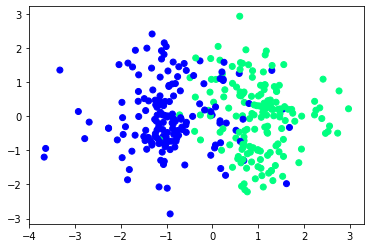

In [27]:
plt.scatter(X_train[:,0],X_train[:,1],c =y_train,cmap='winter');

In [28]:
w = md1.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(5,30)

b = md1.support_vectors_[0]
yy_down = a * xx + (b[1] - a* b[0])
b = md1.support_vectors_[-1]
yy_up = a * xx + (b[1] - a *b[0])

In [29]:
import seaborn as sns

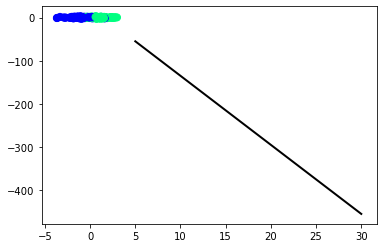

In [30]:
pred = md1.predict(X_test)
plt.scatter(X_train[:,0],X_train[:,1],c =y_train,s=50,cmap='winter');

plt.plot(xx,yy_down,linewidth=2,color='black')

In [31]:
#A dash of data